<a href="https://colab.research.google.com/github/Thitichaya2000/multivariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA (Principle Component Analysis)

Project
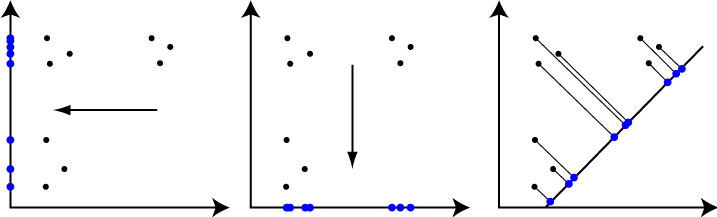


1. Standardizing the Data (ปรับ mean และ std ให้มี mean=0 std=1)

2. Caculating the covariance matrix(หา covariance matrix ของข้อมูลเรา )

3. Computing the Eigenvectors and Eigenvalues(คำนวณ eigen value-vectors)

4. Picking Principal Components Using the Explained Variance(เลือกมาเฉพาะ eigens ที่จำเป็น)

5. Project Data Onto Lower-Dimensional Linear Subspace(map data ไปบนแกนใหม่)

#PCA step by step

In [ ]:
import pandas as pd 

##load data

In [ ]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df  ##อย่าลืม import pandas

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


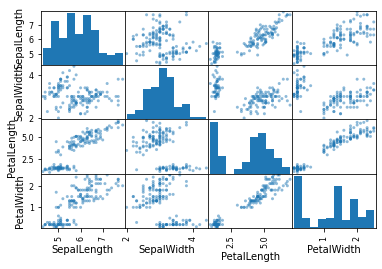

In [ ]:
pd.plotting.scatter_matrix(example_df) ;

In [ ]:
import numpy as np


In [ ]:
data_matrix = np.array(example_df .iloc[:,:-1])
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
data_matrix = data_matrix.T
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

#Standardizing the Data (ปรับ mean และ std ให้มี mean=0 std=1)

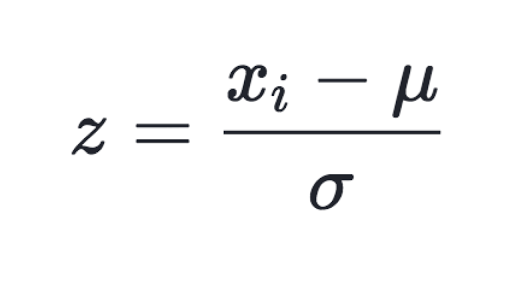

##วิธีซับซ้อน

In [ ]:
meanD = np.mean(data_matrix,axis=1)
meanD 

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [ ]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [ ]:
zeromatrix = np.zeros((4 , 10))
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
zeromatrix - meanD

ValueError: ignored

In [ ]:
zeromatrix - meanD.reshape((4 , 1)) ## คำสั่ง reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

##เลื่อน mean มาที่ 0

In [ ]:
data_matrix_m0 = data_matrix - meanD.reshape((4 , 1))
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [ ]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

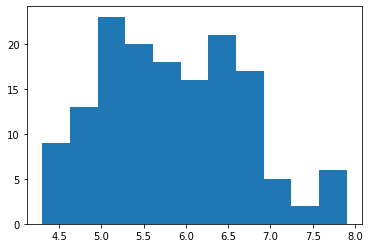

In [ ]:
plt.hist(data_matrix[0, :],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

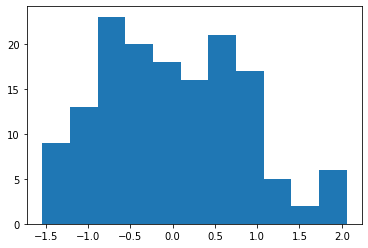

In [ ]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

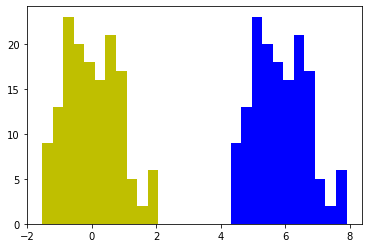

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [ ]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.87002413, -1.47347474, -1.07692535, -0.68037595, -0.28382656,
         0.11272284,  0.50927223,  0.90582163,  1.30237102,  1.69892041,
         2.09546981,  2.4920192 ]),
 <a list of 11 Patch objects>)

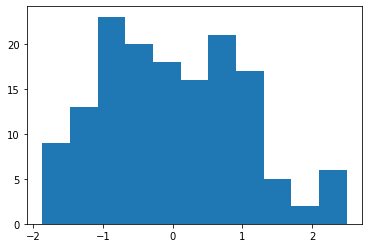

In [ ]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

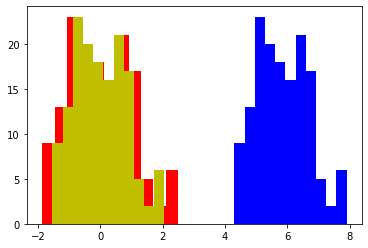

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [ ]:
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [ ]:
np.mean(data_matrix_m0_std1,axis=1)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [ ]:
np.std(data_matrix_m0_std1,axis=1)

array([1., 1., 1., 1.])

## วิธีแบบเร็ว 

In [ ]:
from scipy import stats

In [ ]:
data_matrix_m0_std1_useSTAT = stats.zscore(data_matrix,axis=1)
data_matrix_m0_std1_useSTAT

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

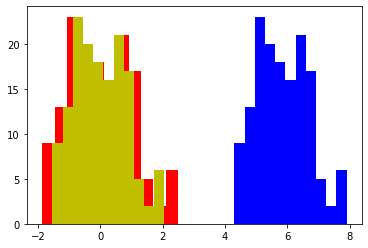

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1_useSTAT[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

## 2. Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)

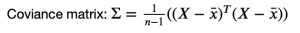

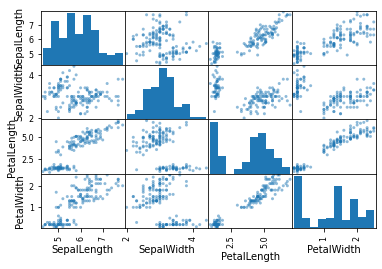

In [ ]:
pd.plotting.scatter_matrix(example_df);

In [ ]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## 3 คำนวณ Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)

In [ ]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

##4 Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)

คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน

In [ ]:
sum(eigen_values)

4.026845637583896

In [ ]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]


In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [ ]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

##5 Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)
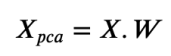

In [ ]:
X = data_matrix_m0_std1
X.shape

(4, 150)

In [ ]:
W = selected_eigen_vectors
W.shape

(4, 2)

In [ ]:
X_pca = X.T.dot(W)
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

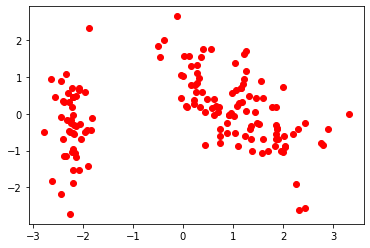

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')

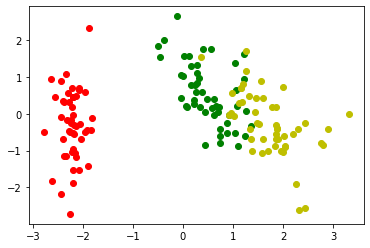

In [ ]:
plt.plot(X_pca[:50,0],X_pca[:50,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

##PCA

**Import**

In [ ]:
from sklearn.decomposition import PCA

**Define**

In [ ]:
pca = PCA(n_components=2)

**Fit- Transform**

In [ ]:
new_pca = pca.fit_transform(X.T)  ## record - แถว  , dimension - หลัก

In [ ]:
new_pca

NameError: ignored

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

NameError: ignored

#**Example**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334,20.75,27.68,0.45,0.45,0.0,174,0.235,1.65,0.0,0.24,65,0.380,0.520,0.070,184,0.019,0.50,20,0.034,188,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300,19.80,24.26,0.46,0.46,0.0,241,0.227,1.30,0.0,0.21,62,0.630,0.488,0.028,388,0.021,0.33,20,0.038,347,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376,25.18,29.20,3.06,0.00,0.0,271,0.074,0.27,0.0,0.00,18,0.180,0.450,0.031,673,0.024,0.64,22,0.021,490,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406,24.04,33.82,1.33,0.28,0.0,263,0.049,0.88,0.0,0.78,26,0.039,0.434,0.027,675,0.056,0.16,27,0.033,473,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387,23.37,30.60,4.78,0.00,0.0,233,0.074,0.83,0.0,0.00,18,0.080,0.293,0.046,643,0.042,0.21,21,0.012,464,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


##**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

In [3]:
data.shape

(8618, 45)

##**ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ**

In [ ]:
pd.plotting.scatter_matrix(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75686f3910>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

Error in callback <function flush_figures at 0x7f75c665b440> (for post_execute):


KeyboardInterrupt: ignored

#**เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก**

###**เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข**

In [4]:
newdata = data.iloc[:,7:]
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**ตรวจสอบว่า ระหว่าง column มี แcorreltion กันมากน้อยแค่ไหน ด้วย numpy**

In [5]:
import numpy as np

In [6]:
corr = np.corrcoef(newdata.to_numpy().T)

In [7]:
corr.shape

(38, 38)

In [8]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [9]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

column = 9 <=> column = 26 corrcoef = 1.0
column = 10 <=> column = 27 corrcoef = 1.0
column = 11 <=> column = 28 corrcoef = 1.0
column = 12 <=> column = 29 corrcoef = 1.0
column = 13 <=> column = 30 corrcoef = 1.0
column = 14 <=> column = 31 corrcoef = 1.0
column = 15 <=> column = 32 corrcoef = 1.0
column = 21 <=> column = 36 corrcoef = 1.0
column = 22 <=> column = 37 corrcoef = 1.0
column = 26 <=> column = 9 corrcoef = 1.0
column = 27 <=> column = 10 corrcoef = 1.0
column = 28 <=> column = 11 corrcoef = 1.0
column = 29 <=> column = 12 corrcoef = 1.0
column = 30 <=> column = 13 corrcoef = 1.0
column = 31 <=> column = 14 corrcoef = 1.0
column = 32 <=> column = 15 corrcoef = 1.0
column = 36 <=> column = 21 corrcoef = 1.0
column = 37 <=> column = 22 corrcoef = 1.0


In [10]:
newdata.iloc[:5,10:30]


,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [11]:
from matplotlib import pyplot as plt

**data ที่มี correlation เป็น 1**

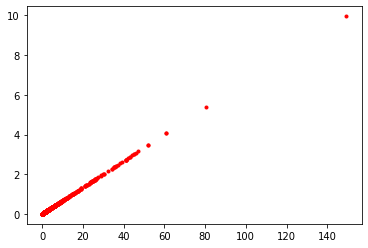

In [12]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

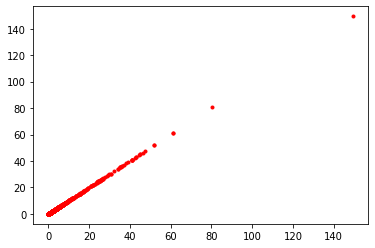

In [13]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

###**data ที่มี correllation เป็นค่าอื่นๆ**

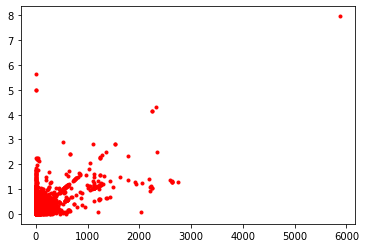

In [14]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

##ลบ column ซ้ำ

correlation เป็น 1 = มันซ้ำกัน

In [15]:
newdata.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [16]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [19]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,2.38,15,3.300,0.190,0.020,66,0.100,1.40,60,0.000,254,73.4,1.10
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,0.00,20,1.076,0.024,0.012,10,0.033,0.58,37,0.029,426,21.7,1.55
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0.00,0,0.100,0.060,0.130,13,0.020,3.60,10,0.000,8,0.7,0.19
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,5.00,6,1.400,0.120,0.010,10,0.400,3.50,250,0.000,272,27.4,1.00


##Quiz1 ลบ column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

In [20]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [21]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


###ทดลอง plot กราฟ parallel coordinate

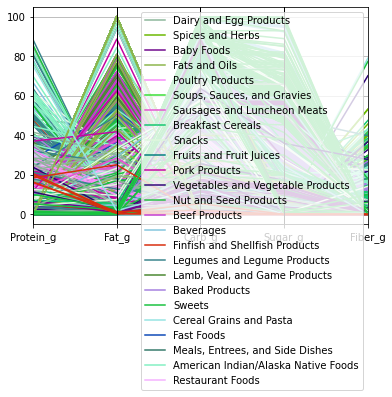

In [28]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])


##ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [26]:
new_pca.shape

(8618, 2)

In [59]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

###ดูว่ามี food group อะไรบ้าง

In [60]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

###สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

###สร้าง color list แบบง่าย (เมื่อรันใหม่เลขลำดับอาจเปลี่ยนแปลง)

In [61]:
color_list = {}
num = 0
for each_fg in FG:
    if each_fg not in color_list:
       color_list[each_fg] = num
       num += 1

In [62]:
color_list

{'American Indian/Alaska Native Foods': 10,
 'Baby Foods': 15,
 'Baked Products': 12,
 'Beef Products': 1,
 'Beverages': 7,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 21,
 'Dairy and Egg Products': 20,
 'Fast Foods': 11,
 'Fats and Oils': 3,
 'Finfish and Shellfish Products': 13,
 'Fruits and Fruit Juices': 18,
 'Lamb, Veal, and Game Products': 19,
 'Legumes and Legume Products': 0,
 'Meals, Entrees, and Side Dishes': 22,
 'Nut and Seed Products': 23,
 'Pork Products': 9,
 'Poultry Products': 6,
 'Restaurant Foods': 24,
 'Sausages and Luncheon Meats': 16,
 'Snacks': 17,
 'Soups, Sauces, and Gravies': 8,
 'Spices and Herbs': 4,
 'Sweets': 14,
 'Vegetables and Vegetable Products': 2}

### สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [63]:
FG_l = list(FG)  # แบ่งเป็นlist
FG_l.sort()  # การเรียงค่าสมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

TypeError: ignored

In [64]:
color_list2

NameError: ignored

###แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [31]:
data_dropped2 = data_dropped.replace(color_list)


In [32]:
data_dropped2


,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,20,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,20,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,20,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,20,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,20,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,13,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,13,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,14,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,13,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot  กราฟ Scatter

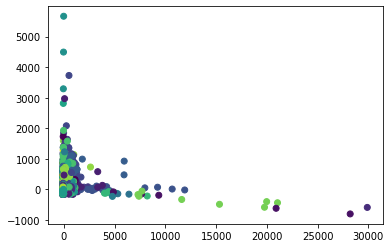

In [33]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

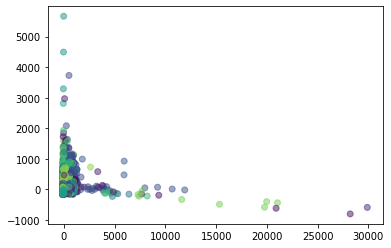

In [34]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ sweet

In [65]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==8)]  ###  ใช้ | และ & แทน or และ and ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
1181,8,69,1.82,3.26,8.52,0.72,0.4,26,0.010,0.04,2.2,19,23,0.100,0.64,0.300,1.9,0.028889,0.005882,0.016667,0.024444,0.032667,0.0475,0.038750,0.047692,0.035833,0.019167,0.000111,0.007143,0.044286,0.034545,0.063636
1182,8,91,4.83,1.32,15.42,2.49,6.8,22,0.070,0.00,0.2,66,35,0.300,1.50,0.500,0.0,0.024444,0.041176,0.000000,0.002222,0.024000,0.1650,0.025625,0.030000,0.035000,0.029167,0.000333,0.078571,0.107143,0.000000,0.100000
1183,8,40,2.38,1.59,4.76,0.79,0.0,0,0.000,0.00,0.0,0,0,0.000,0.29,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1184,8,129,5.88,4.42,16.97,3.00,5.9,34,0.031,0.03,1.2,24,60,0.300,1.53,0.500,6.4,0.037778,0.018235,0.012500,0.013333,0.058000,0.0600,0.026312,0.019231,0.054167,0.050000,0.000333,0.078571,0.140000,0.116364,0.070000
1185,8,142,7.60,5.31,16.75,0.00,4.6,33,0.100,0.06,0.7,24,66,0.300,1.78,0.600,6.9,0.036667,0.058824,0.025000,0.007778,0.000000,0.0600,0.048750,0.037692,0.069167,0.055000,0.000333,0.088095,0.180000,0.125455,0.081818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,8,170,0.91,0.67,39.95,35.29,1.0,16,0.090,0.00,0.3,0,43,0.089,0.69,0.136,0.0,0.017778,0.052941,0.000000,0.003333,0.060667,0.0000,0.039813,0.048462,0.025000,0.035833,0.000099,0.038095,0.031429,0.000000,0.015455
7733,8,160,1.00,0.52,37.92,30.95,1.4,14,0.093,0.00,0.2,0,40,0.072,1.09,0.178,0.0,0.015556,0.054706,0.000000,0.002222,0.064000,0.0000,0.049188,0.056154,0.022500,0.033333,0.000080,0.038095,0.034286,0.000000,0.020000
7734,8,132,0.44,1.41,29.45,23.49,0.5,1,0.015,0.00,0.0,0,20,0.015,0.15,0.071,0.0,0.001111,0.008824,0.000000,0.000000,0.014000,0.0000,0.010000,0.016923,0.012500,0.016667,0.000017,0.011905,0.024286,0.000000,0.010909
7735,8,257,6.31,16.02,22.02,17.07,1.8,0,0.190,0.00,0.0,22,22,0.123,0.91,0.484,3.4,0.000000,0.111765,0.000000,0.000000,0.148667,0.0550,0.200000,0.097692,0.050000,0.018333,0.000137,0.107143,0.152857,0.061818,0.070909


In [67]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(bb.iloc[:,1:]).to_numpy())

SyntaxError: ignored

ValueError: ignored

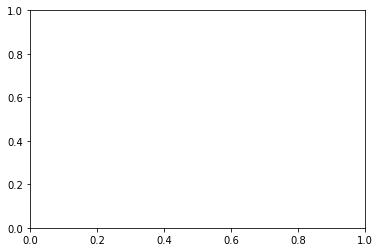

In [68]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = bb['FoodGroup'],alpha=0.5)
plt.legend(['baby','fast'])

In [ ]:
baby_pca = pca.transform(bb.iloc[:,1:]).to_numpy())

### 2.Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [ ]:
pca.explained_variance_ratio_
array([])